# 聚类


聚类是一种非监督式的机器学习方法。所谓聚类，即是将一堆的数据点划分到一定数量的簇（cluster）中，使得位于同一个簇中的数据点之间的相似度高（距离小），位于不同簇中的数据点之间的相似度低（距离大）。

聚类可以帮助我们发现数据的结构。它有着很多的应用：比如社交网络的社群检测，搜索结果的组织等。常用的聚类方法有：层次聚类，K-Means聚类，谱聚类等。

## K-Means 算法

K-Means 是一个非常简单、经典的聚类算法。K-Means 的优化目标为最小化各数据点到其所属中心点的距离的平方的和。初始中心点的坐标对结果的影响比较敏感。

#### 算法流程

基本的 K-Means 聚类算法流程如下：

1. 选取 K 个数据点作为初始的 centroids

2. 将所有数据点分配到离其最近的那个 centroid 所表示的簇中

3. 更新每个簇的 centroid 为该簇中所有数据点的均值

4. 重复第2、3步直至 centroids 不再改变或者超出给定的迭代次数


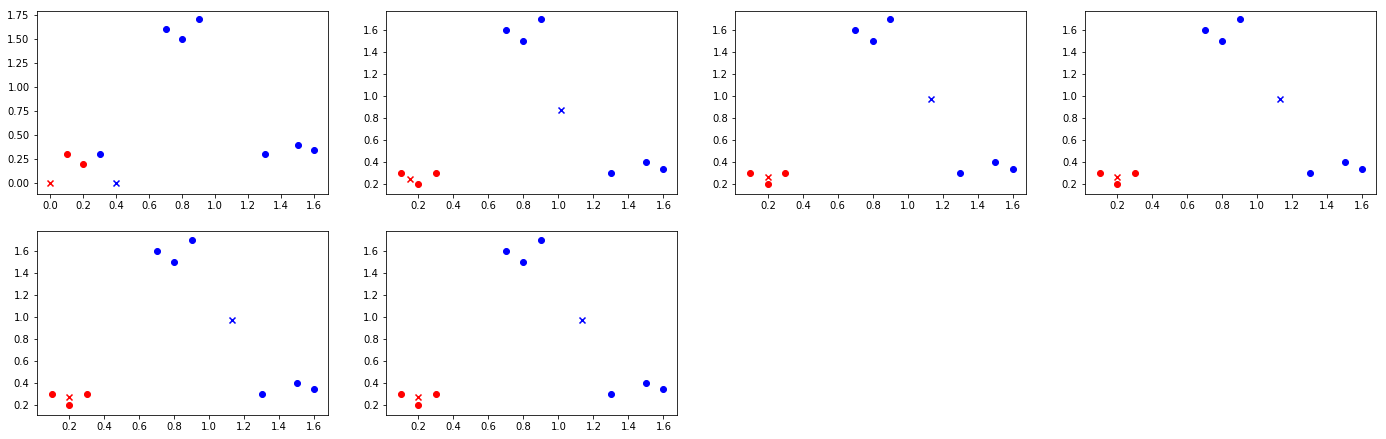

In [6]:
# K-means 算法简单实现
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.array([[0.1,0.3],[0.2,0.2],[0.3,0.3],
            [1.3,0.3],[1.5,0.4],[1.6,0.34],
            [0.8,1.5],[0.7,1.6],[0.9,1.7]])

##############k-Means算法#################

# 创建k个聚类数组，用于存放属于该聚类的点
clusters = []
p1 = [0.,0]
p2 = [0.4,0]  # [0.4,0], [0.4,1.5], [0.1,0]
cluster_center = np.array([p1,p2])  # 第一步
color_list = ['red','blue','green']
k = 2
for i in range(k):
    clusters.append([]) 
    
epoch = 6
plt.figure(figsize=(24, 48))
for idx in range(epoch):
    for i in range(k):
        clusters[i]=[]
    # 计算所有点到这k个聚类中心的距离
    for i in range(x.shape[0]):
        xi = x[i]        
        distances = np.sqrt(np.sum((cluster_center-xi)**2,axis=1))
        # 离哪个聚类中心近，就把这个点序号加到哪个聚类中  
        c = np.argmin(distances)  # 第二步 
        clusters[c].append(i)
    
    # 画出每一步的图
    plt.subplot(12, 4, idx+1)
    for clus_idx in range(k):        
        plt.scatter(x[clusters[clus_idx],0],x[clusters[clus_idx],1],color=color_list[clus_idx])
        plt.scatter(cluster_center[clus_idx,0],cluster_center[clus_idx,1],marker='x',color=color_list[clus_idx])

    # 重新计算k个聚类的聚类中心（每个聚类所有点加起来取平均）
    for i in range(k):
        cluster_center[i] = np.sum(x[clusters[i]],axis=0)/len(clusters[i])  #第三步  
    

K-means算法迭代结束，迭代次数： 3 次


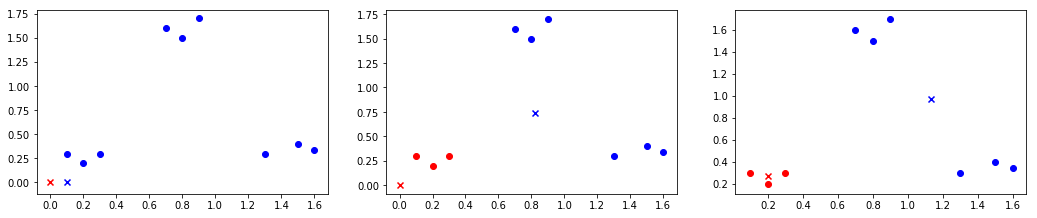

In [3]:
# K-means 算法简单实现  
#++ 处理有聚类为空的情况
#++ 迭代自动结束

import matplotlib.pyplot as plt
import numpy as np

x = np.array([[0.1,0.3],[0.2,0.2],[0.3,0.3],
            [1.3,0.3],[1.5,0.4],[1.6,0.34],
            [0.8,1.5],[0.7,1.6],[0.9,1.7]])

##############k-Means算法#################

# 创建k个聚类数组，用于存放属于该聚类的点
clusters = []
p1 = [0.,0]
p2 = [0.1,0]  # [0.4,0], [0.4,1.5], [0.1,0]
cluster_center = np.array([p1,p2])  # 第一步
color_list = ['red','blue','green']
k = 2
for i in range(k):
    clusters.append([])
    
epoch = 6
plt.figure(figsize=(24, 48))

for idx in range(epoch):
    for i in range(k):
        clusters[i]=[]
    # 计算所有点到这k个聚类中心的距离
    for i in range(x.shape[0]):
        xi = x[i]
        distances = np.sqrt(np.sum((cluster_center-xi)**2,axis=1))
        # 离哪个聚类中心近，就把这个点序号加到哪个聚类中  
        c = np.argmin(distances)  # 第二步
        clusters[c].append(i)
    
    # 画出每一步的图
    plt.subplot(12, 4, idx+1)
    for clus_idx in range(k):        
        plt.scatter(x[clusters[clus_idx],0],x[clusters[clus_idx],1],color=color_list[clus_idx])
        plt.scatter(cluster_center[clus_idx,0],cluster_center[clus_idx,1],marker='x',color=color_list[clus_idx])

    # 重新计算k个聚类的聚类中心（每个聚类所有点加起来取平均）    
    update_key = False
    for i in range(k):        
        if clusters[i] == []: continue
        new_cluster_center = np.sum(x[clusters[i]],axis=0)/len(clusters[i])        
        if (cluster_center[i] != new_cluster_center).all():
            cluster_center[i] = new_cluster_center  #第三步
            update_key = True
    if update_key == False:
        print("K-means算法迭代结束，迭代次数：",idx+1,"次")
        break        
    

K-means算法迭代结束，迭代次数： 3 次


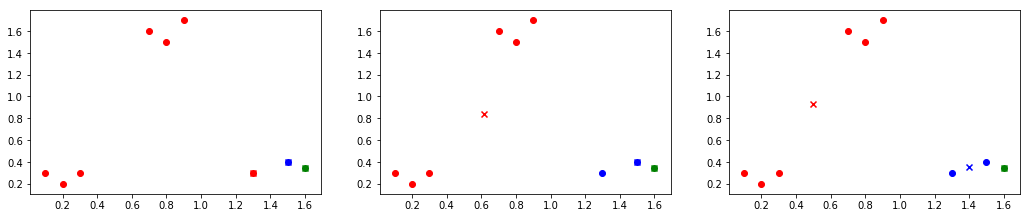

In [45]:
# K-means 算法简单实现  
#++ 处理有聚类为空的情况
#++ 迭代自动结束
#++ 随机初始化聚类中心点
#++ 指定聚类个数

import matplotlib.pyplot as plt
import numpy as np

x = np.array([[0.1,0.3],[0.2,0.2],[0.3,0.3],
            [1.3,0.3],[1.5,0.4],[1.6,0.34],
            [0.8,1.5],[0.7,1.6],[0.9,1.7]])

##############k-Means算法#################

# 创建k个聚类数组，用于存放属于该聚类的点
clusters = []
k = 3
random_idx = np.random.choice(np.array(len(x)),k) # 第一步
cluster_center = x[random_idx]
color_list = ['red','blue','green','orange','purple','black','yellow']
for i in range(k):
    clusters.append([])
    
epoch = 6
plt.figure(figsize=(24, 48))

for idx in range(epoch):
    for i in range(k):
        clusters[i]=[]
    # 计算所有点到这k个聚类中心的距离
    for i in range(x.shape[0]):
        xi = x[i]
        distances = np.sqrt(np.sum((cluster_center-xi)**2,axis=1))
        # 离哪个聚类中心近，就把这个点序号加到哪个聚类中  
        c = np.argmin(distances)  # 第二步
        clusters[c].append(i)
    
    # 画出每一步的图
    plt.subplot(12, 4, idx+1)
    for clus_idx in range(k):        
        plt.scatter(x[clusters[clus_idx],0],x[clusters[clus_idx],1],color=color_list[clus_idx])
        plt.scatter(cluster_center[clus_idx,0],cluster_center[clus_idx,1],marker='x',color=color_list[clus_idx])

    # 重新计算k个聚类的聚类中心（每个聚类所有点加起来取平均） 
    update_key = False
    for i in range(k):        
        if clusters[i] == []: continue
        new_cluster_center = np.sum(x[clusters[i]],axis=0)/len(clusters[i])        
        if (cluster_center[i] != new_cluster_center).all():
            cluster_center[i] = new_cluster_center  #第三步
            update_key = True
    if update_key == False:
        print("K-means算法迭代结束，迭代次数：",idx+1,"次")
        break        
    

(array([[-0.53373421,  0.74350845],
       [ 0.18487927,  0.12336325],
       [ 0.86381059,  0.57534615],
       ...,
       [ 1.95917859,  0.46259999],
       [-0.91654502,  0.45261614],
       [ 1.64228933, -0.30286106]]), array([0, 1, 0, ..., 1, 0, 1], dtype=int64))


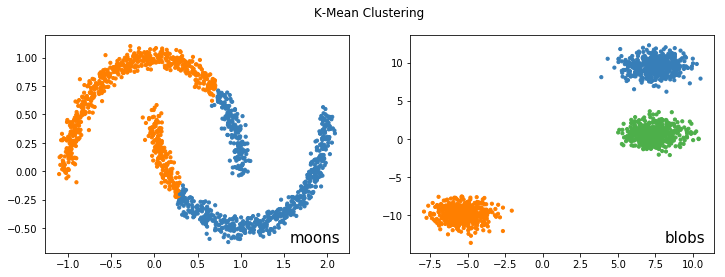

In [26]:
# K-means 算法使用SKlearn实现  

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons

# Generate datasets. 
n_samples = 1500
blobs = make_blobs(n_samples=n_samples, random_state=8)
noisy_moons = make_moons(n_samples=n_samples, noise=.05)

print(noisy_moons)

datasets = [
    (noisy_moons, {'name':'moons', 'n_clusters': 2}),    
    (blobs, {'name':'blobs', 'n_clusters': 3})]

plt.figure(figsize=(12, 4))
for idx, (dataset, params) in enumerate(datasets):
    X, y = dataset
    clt = KMeans(n_clusters=params['n_clusters']).fit(X)
    y_pred = clt.predict(X)
    colors = np.array(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00'])

    plt.subplot(1, 2, idx+1)
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
    plt.text(x=.97, y=.05, s=params['name'], transform=plt.gca().transAxes, 
             size=15, horizontalalignment='right')

plt.suptitle("K-Mean Clustering");
plt.show()

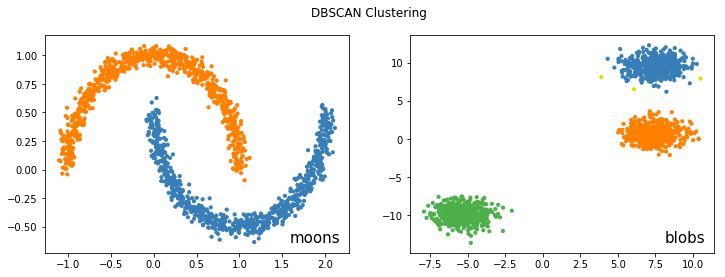

In [27]:
# DBScan 算法使用SKlearn实现  

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs, make_moons

# Generate datasets. 
n_samples = 1500
blobs = make_blobs(n_samples=n_samples, random_state=8)
noisy_moons = make_moons(n_samples=n_samples, noise=.05)

datasets = [
    (noisy_moons, {'name':'moons', 'eps': 0.2}),    
    (blobs, {'name':'blobs', 'eps': 1})]

plt.figure(figsize=(12, 4))
for idx, (dataset, params) in enumerate(datasets):
    X, y = dataset
    clt = DBSCAN(eps=params['eps']).fit(X)
    y_pred = clt.labels_
    colors = np.array(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00'])

    plt.subplot(1, 2, idx+1)
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
    plt.text(x=.97, y=.05, s=params['name'], transform=plt.gca().transAxes, 
             size=15, horizontalalignment='right')

plt.suptitle("DBSCAN Clustering");
plt.show()